<a href="https://colab.research.google.com/github/morrea1/MANE-4962/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework 1 - Alex Morreale

## Question 1

In [ ]:
import numpy as np

x1 = np.array([2, 3, 4, 8, 9])
x2 = np.array([2, -3, -4, 89])

l1x1 = np.sum(np.abs(x1))
l1x2 = np.sum(np.abs(x2))

l2x1 = np.sqrt(np.sum(x1**2))
l2x2 = np.sqrt(np.sum(x2**2))

linfx1 = np.max(np.abs(x1))
linfx2 = np.max(np.abs(x2))

print("Part A:")
print("{} features in x1, {} features in x2".format(len(x1), len(x2)), end = '\n\n')


print("Part B:")
print("x1: L1 = {}, L2 = {:.4f}, Linf = {}". format(l1x1, l2x1, linfx1))
print("x2: L1 = {}, L2 = {:.4f}, Linf = {}". format(l1x2, l2x2, linfx2))

Part A:
5 features in x1, 4 features in x2

Part B:
x1: L1 = 26, L2 = 13.1909, Linf = 9
x2: L1 = 98, L2 = 89.1628, Linf = 89


#Question 2

In [ ]:
import numpy as np

input_length = 1024 * 1024 *3
output_length = 64 * 64 * 3

w_length = output_length * input_length
b_length = output_length

print("Part A:")
print("Length of input vector x = {}".format(input_length))

print("Part B:")
print("Length of output vector y = {}".format(output_length))

print("Part C:")
print("Matrix W has {} elements. Vector b has {} elements.".format(w_length, b_length))



Part A:
Length of input vector x = 3145728
Part B:
Length of output vector y = 12288
Part C:
Matrix W has 38654705664 elements. Vector b has 12288 elements.


# Question 3

In [ ]:
import numpy as np

w = np.array([[1, -1], [2, 0]])

one_norm = np.sum(np.abs(w), axis=0).max()
two_norm = np.linalg.norm(w, 2)
inf_norm = np.sum(np.abs(w), axis = 1).max()
frob_norm = np.linalg.norm(w, 'fro')

print("1-norm = {}".format(one_norm))
print("2-norm = {:.4f}".format(two_norm))
print("infinity-norm = {}".format(inf_norm))
print("Frobenius norm = {:.4f}".format(frob_norm))



1-norm = 3
2-norm = 2.2882
infinity-norm = 2
Frobenius norm = 2.4495


# Question 4

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [13]:
X = iris.data
y = iris.target

X = iris.data[:, :3] # selecting first 3 features
y = iris.target

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [15]:
preds = clf.predict(X_test)
print(preds)

[1 1 1 1 0 2 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 2 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 2 0 0 1 1 2 1 2 1 1 2 1 1]


In [16]:
print('actual iris species')
print(y_test)

actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]


In [17]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.9333333333333333


# Queston 5

In [1]:
#Derived from lecture code by Prof. Chowdhury

import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


#Load dataset
#split into input (X) and output (y)
X = np.array([[1], [4], [9], [16], [25], [36], [49], [64], [81], [100]])
X = X*1.0
y = X**(1/7)

print("y: {}".format(y))

y: [[1.        ]
 [1.21901365]
 [1.36873811]
 [1.48599429]
 [1.58381961]
 [1.66851044]
 [1.74363903]
 [1.81144733]
 [1.873444  ]
 [1.93069773]]


In [3]:

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 437 (1.71 KB)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 292 (1.14 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[1.0] => 1.03 (expected 1.00)
[4.0] => 1.17 (expected 1.22)
[9.0] => 1.39 (expected 1.37)
[16.0] => 1.54 (expected 1.49)
[25.0] => 1.59 (expected 1.58)
[36.0] => 1.64 (expected 1.67)
[49.0] => 1.71 (expected 1.74)
[64.0] => 1.78 (expected 1.81)
[81.0] => 1.87 (expected 1.87)
[100.0] => 1.97 (expected 1.93)


<ipython-input-3-c99ce0b1d173>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


# Question 6

In [8]:
# Also based on lecture code

import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
from sklearn import datasets

iris = datasets.load_iris(as_frame=True) # makes it a data frame
df = iris.frame

X = df[['sepal length (cm)']].values  # Input
y = df[['petal length (cm)']].values  # Output

model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))


opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(20):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311 (1.22 KB)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208 (836.00 B)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[5.1] => 2.37 (expected 1.40)
[4.9] => 2.00 (expected 1.40)
[4.7] => 1.62 (expected 1.30)
[4.6] => 1.46 (expected 1.50)
[5.0] => 2.18 (expected 1.40)
[5.4] => 2.93 (expected 1.70)
[4.6] => 1.46 (expected 1.40)
[5.0] => 2.18 (expected 1.50)
[4.4] => 1.17 (expected 1.40)
[4.9] => 2.00 (expected 1.50)
[5.4] => 2.93 (expected 1.50)
[4.8] => 1.81 (expected 1.60)
[4.8] => 1.81 (expected 1.40)
[4.3] => 1.03 (expected 1.10)
[5.8] => 3.67 (expected 1.20)
[5.7] => 3.49 (expected 1.50)
[5.4] => 2.93 (expected 1.30)
[5.1] => 2.37 (expected 1.40)
[5.7] => 3.49 (expected 1.70)
[5.1] => 2.37 (expected 1.50)


<ipython-input-8-ee061204aa09>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


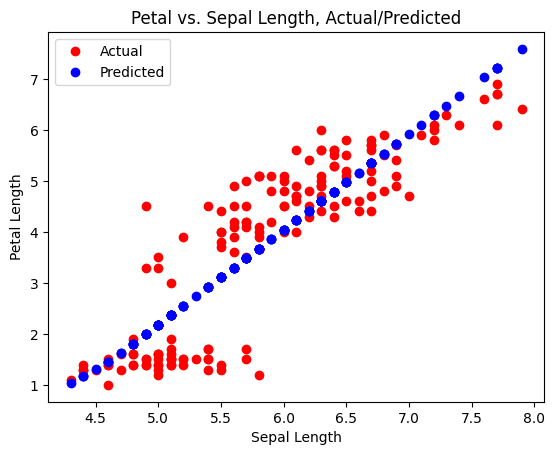

In [13]:
import matplotlib.pyplot as plt

for i in range(len(X)):
  plt.plot(X[i], y[i], 'ro', label='Actual' if i == 0 else "")
  plt.plot(X[i], predictions[i], 'bo', label='Predicted' if i == 0 else "")

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Petal vs. Sepal Length, Actual/Predicted')
plt.legend()
